integral= 0.29371525706963225 λ


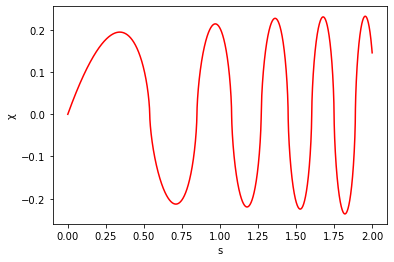

In [2]:
# Repoducing the result of eq.(14) in research paper "The merger rate of primordial-black-hole 
# binaries".

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity






def f(u,s):
    return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(((u[0]**2+b**2)**(3/2))))]
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,2,1000000)  # not right as the final value of scale factor, s does not corresponds to the 
                                   # radiation domintaion era.
us= odeint(f,separation0,ss)
separations= us[:,0]

s_list=ss.tolist()
χ=separations**2
s_telda=ss**2
integrand=(χ/s_telda)
Y=np.trapz(integrand,s_list)
print("integral=",Y,"λ") 





plt.plot(ss,separations,'r')
plt.xlabel('s')
plt.ylabel('χ')
plt.show()

l_list= [3.62737085e-05 6.66919528e-05 9.66276897e-05 1.26287701e-04
 1.55750577e-04 1.85135127e-04 2.14477445e-04 2.43786551e-04
 2.73067216e-04 3.02318203e-04 5.94049078e-04 8.85009486e-04
 1.17566495e-03 1.46617667e-03 1.75674014e-03 2.04707549e-03
 2.33753078e-03 2.62724517e-03 2.91817382e-03 5.82186394e-03
 8.72752712e-03 1.16248297e-02 1.45381874e-02 1.74278985e-02
 2.03507279e-02 2.32344159e-02 2.61462395e-02]


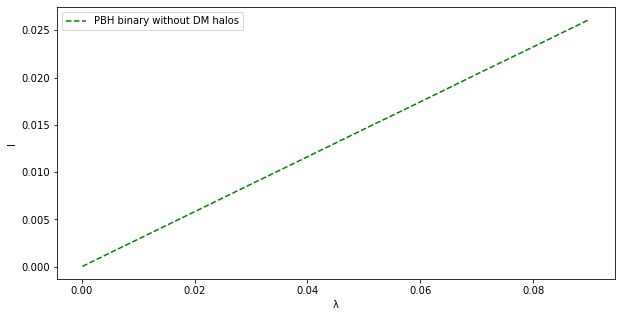

In [58]:
# Repoducing the result of eq.(14) (with λ-values) in research paper "The merger rate of
# primordial-black-hole binaries".

def Y(a,b):
    return (np.trapz(a,b))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
l_1_list=np.zeros(len(λ_1_list))


def Integral(integrand):    
    def f(u,s):
        return  [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]
    b=1e-6
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000)  # not right as the final value of scale factor, s does not corresponds to the 
                                   # radiation domintaion era.
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand=(χ/s_telda)
    y=np.trapz(integrand,s_list)
    return y

for i, λ_0 in enumerate(λ_1_list):
        l_1_list[i] = Integral(integrand)
print("l_list=",l_1_list)          
        
plt.figure(figsize=(10,5))        
plt.plot(λ_1_list,l_1_list,'g--')
plt.xlabel('λ')
plt.ylabel('l')
plt.legend(["PBH binary without DM halos"])
plt.savefig("angular momentum,l vs λ in radiation domination without DM halos .pdf")        
plt.show()

l= [3.02324723e-05 6.04652964e-05 9.07009127e-05 1.20933574e-04
 1.51168953e-04 1.81406219e-04 2.11643869e-04 2.41881011e-04
 2.72120149e-04 3.02362630e-04 6.04806726e-04 9.07324850e-04
 1.20995180e-03 1.51263149e-03 1.81541517e-03 2.11828172e-03
 2.42121960e-03 2.72426042e-03 3.02736363e-03 6.06289414e-03
 9.10548158e-03 1.21526583e-02 1.52039808e-02 1.82642584e-02
 2.13348717e-02 2.44145932e-02 2.75017299e-02]


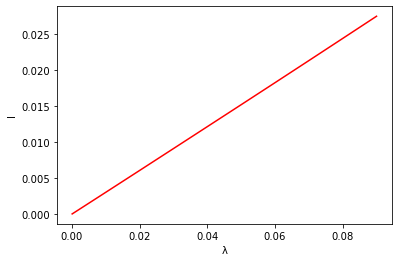

In [33]:
   #Solution of eq.(42) without numerical factors using extended mass function in 
# pdf "Tidal forces on the PBH binary". 


# Numerical factors of eq.(42).
A=(3/(8*G*π*rho_eq))**(1/2)
B=(((8*π*G*rho_eq*(t_eq**6))/3)**(1/4))
M= (1+ (((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4)))   # M=M_NPBH/M_Neq




def M_r_halo(s):    #Mass of the DM halo eq.(38) in pdf "Tidal forces on the PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 

def λ_r(s):
    return ((λ_0)/(n_r(s)))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

l_r=np.zeros(len(λ_1_list))


def integral(integrand):  
    def f(u,s):                                # radiation-domination case
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(32) in 
                                               #reference pdf pdf "Tidal forces on the PBH binary".
    separation0= [1e-12,1]
    b= ((λ_0)/1000)
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand_1=(χ/s_telda)
    integrand_2=(χ/s_list) 
    Y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    Z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    X=Y+Z
    return X

    
for i, λ_0 in enumerate(λ_1_list):
    l_r[i] = integral(integrand)
print("l=",l_r)        
        
     
plt.plot(λ_1_list,l_r,'r')
plt.xlabel('λ')
plt.ylabel('l')
        
plt.show()

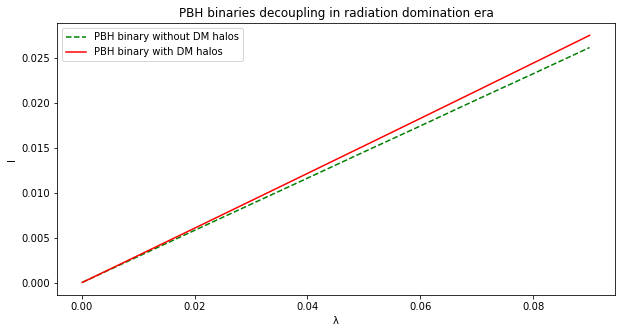

In [59]:
plt.figure(figsize=(10,5))
plt.plot(λ_1_list,l_1_list,'g--')
plt.plot(λ_1_list,l_r,'r')
plt.xlabel("λ")
plt.ylabel("l")
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"])
plt.title('PBH binaries decoupling in radiation domination era')
plt.savefig("angular momentum,l vs λ in radiation domination with & without DM halos .pdf")
plt.show()

L= [1.47326737e+08 2.94650403e+08 4.41982891e+08 5.89296201e+08
 7.36617969e+08 8.83944148e+08 1.03126742e+09 1.17858343e+09
 1.32590439e+09 1.47323686e+09 2.94639280e+09 4.41943224e+09
 5.89252497e+09 7.36539893e+09 8.83830370e+09 1.03111373e+10
 1.17838443e+10 1.32565785e+10 1.47291440e+10 2.94508271e+10
 4.41604018e+10 5.88470701e+10 7.35098182e+10 8.81716469e+10
 1.02839137e+11 1.17506881e+11 1.32167726e+11]


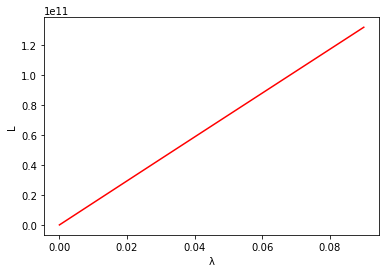

In [35]:
   #Solution of eq.(42) with numerical factors using extended mass function in 
# pdf "Tidal forces on the PBH binary". 


# Numerical factors of eq.(42).
A=(3/(8*G*π*rho_eq))**(1/2)
B=(((8*π*G*rho_eq*(t_eq**6))/3)**(1/4))
M= (1+ (((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4)))   # M=M_NPBH/M_Neq




def M_r_halo(s):    #Mass of the DM halo eq.(38) in pdf "Tidal forces on the PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 

def λ_r(s):
    return ((λ_0)/(n_r(s)))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

L=np.zeros(len(λ_1_list))

def integral(integrand):  
    def f(u,s):                                # radiation-domination case
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(32) in 
                                               #reference pdf pdf "Tidal forces on the PBH binary".
    separation0= [1e-12,1]
    b= ((λ_0)/1000)
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand_1=(χ/s_telda)
    integrand_2=(χ/s_list) 
    Y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    Z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    X=(A*M*Y)+(B*M*Z)
    return X

    
for i, λ_0 in enumerate(λ_1_list):
    L[i] = integral(integrand)
print("L=",L)        
        
        
plt.plot(λ_1_list,L,'r')
plt.xlabel('λ')
plt.ylabel('L')
        
plt.show()


l= [0.28953115 0.43749914 0.5896121  0.74489126 0.90730757 1.07190761
 1.2438697 ]


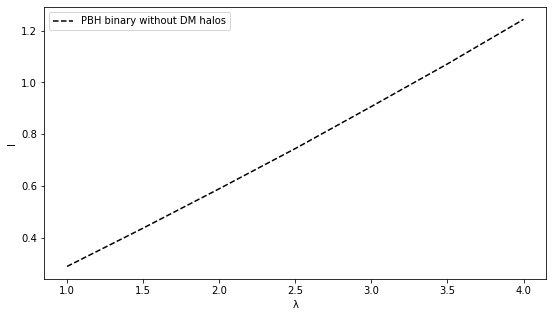

In [60]:
# Solution of eq.(6) in paper "The merger rate of primordial-black-hole 
# binaries".

def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return ((s**4)*h(s))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

h_list=np.zeros(len(s_list))
   

λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
l_2_list=np.zeros(len(λ_2_list))


    


def integral(integrand):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    for i, s in enumerate(s_list):
        h_list[i] = H(s)
    integrand=( χ/h_list)
    y=np.trapz(integrand,s_list)     
    return y
    
    
for k, λ_0 in enumerate(λ_2_list):
    l_2_list[k] = integral(integrand)
print("l=",l_2_list)      
     
plt.figure(figsize=(9,5))    
plt.plot(λ_2_list,l_2_list,'k--')  
plt.xlabel('λ')
plt.ylabel('l')
plt.legend(["PBH binary without DM halos"])
plt.savefig("angular momentum,l vs λ around matter-radiation equality without DM halos .pdf")

plt.show()

l= [0.30627174 0.47500489 0.65549258 0.84785894 1.05177221 1.26754393
 1.49457364]


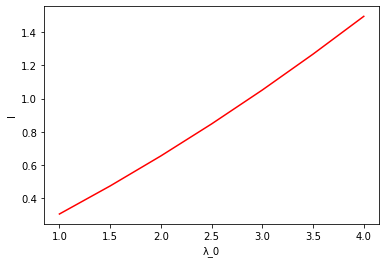

In [39]:
# Solution of eq.(31) without numerical factors  using extended mass function in the 
# pdf "Tidal forces on the PBH binary".


def M_halo(s):              
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))) #eq.(29) in the pdf "Tidal forces on the PBH binary".



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return ((s**4)*h(s))
def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))/H(s))




def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
l_mr=np.zeros(len(λ_2_list))


def Y(integrand):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(23) in the pdf "Tidal forces on the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((8*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    h_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        h_list[i] = H(s)
        I_list[i] = I(s)
    integrand_1=(χ/h_list)
    integrand_2=(χ*I_list) 
    y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    X=y+z
    return X
    
for i, λ_0 in enumerate(λ_2_list):
    l_mr[i] = Y(integrand)
print("l=",l_mr)      
plt.plot(λ_2_list,l_mr,'r')         
plt.xlabel('λ_0')  
plt.ylabel('l')
plt.show()

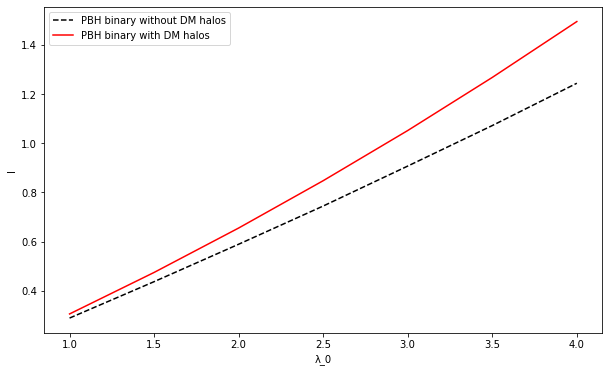

In [61]:
plt.figure(figsize=(10,6))
plt.plot(λ_2_list,l_2_list,'k--')   
plt.plot(λ_2_list,l_mr,'r')         
plt.xlabel('λ_0')  
plt.ylabel('l')
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"])
plt.savefig("angular momentum,l vs λ around matter-radiation equality with & without DM halos .pdf")
plt.show()

L= [1.37743096e+12 2.07304949e+12 2.78395561e+12 3.51198870e+12
 4.25711393e+12 5.02096196e+12 5.80236134e+12]


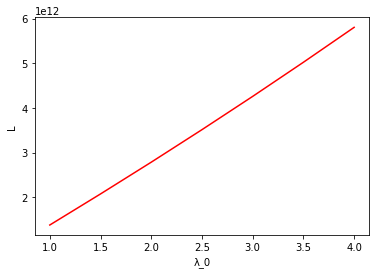

In [41]:
# Solution of eq.(31) with numerical factors  using extended mass function in the 
# pdf "Tidal forces on the PBH binary".


def M_halo(s):              
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))) #eq.(29) in the pdf "Tidal forces on the PBH binary".



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return ((s**4)*h(s))
def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))/H(s))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
L=np.zeros(len(λ_2_list))


def Y(integrand):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(23) in the pdf "Tidal forces on the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((8*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    h_list=np.zeros(len(s_list))
    i_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        h_list[i] = H(s)
        i_list[i] = I(s)
    integrand_1=(χ/h_list)
    integrand_2=(χ*i_list) 
    y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    X=(A*M*y)+(z*B*M)
    return X
    
for i, λ_0 in enumerate(λ_2_list):
    L[i] = Y(integrand)
print("L=",L)      
plt.plot(λ_2_list,L,'r')         
plt.xlabel('λ_0')  
plt.ylabel('L')
plt.show()

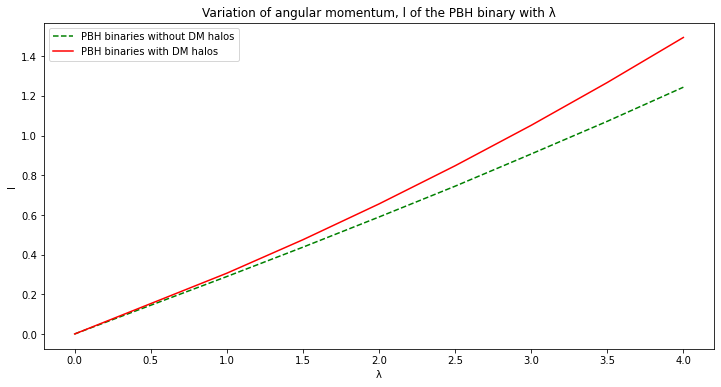

In [62]:
λ_list = λ_1_list+λ_2_list
l = np.append(l_1_list,l_2_list)
l_list=np.append(l_r,l_mr)
plt.figure(figsize=(12,6))
plt.plot(λ_list,l,'g--')
plt.plot(λ_list ,l_list,'r')
plt.xlabel('λ')
plt.ylabel('l')
plt.title('Variation of angular momentum, l of the PBH binary with λ')
plt.legend(["PBH binaries without DM halos","PBH binaries with DM halos"])
plt.savefig("angular momentum,l vs λ for PBH binaries with & without DM halos .pdf")
plt.show()